In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

Bank Marketing dataset
https://archive.ics.uci.edu/dataset/222/bank+marketing

Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.

From UCI:
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


### About the Data
---


### Input variables:
bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



## Understanding the Data

In [143]:
# data separated with ';' 
df = pd.read_csv(r'Bank Marketing - dataset\bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

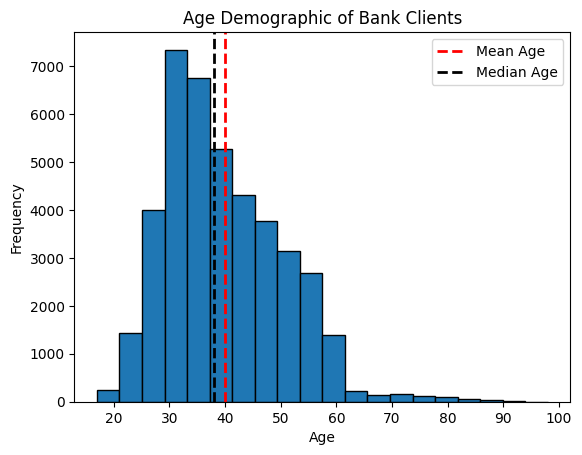

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

In [7]:
# histogram of age of clients
age_hist = plt.hist(df['age'], bins=20, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Demographic of Bank Clients')
# Calculate mean and median age
mean_age = df['age'].mean()
median_age = df['age'].median()

# Add a vertical line for the mean age
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Mean Age')

# Add a vertical line for the median age
plt.axvline(median_age, color='black', linestyle='dashed', linewidth=2, label='Median Age')

plt.legend()
plt.show()
df['age'].describe()

The age demographic of those called by the bank are:
- the most common age of the contacts were in their 30's
- the average age, however is 40 years old, indicating that the bank's target market were those in their middle ages

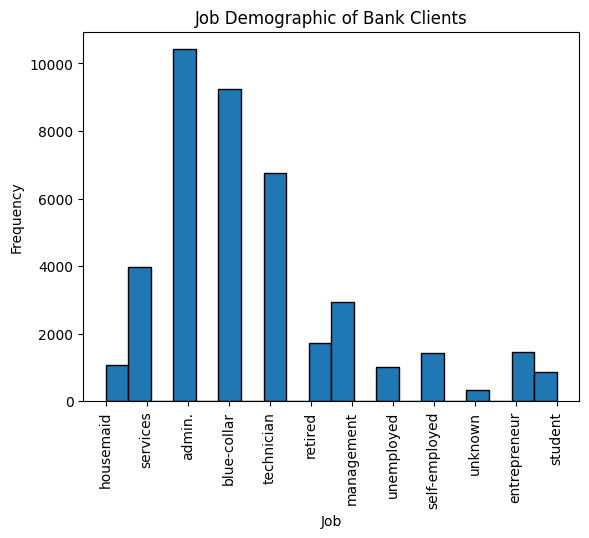

count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

In [8]:
job_hist = plt.hist(df['job'], bins=20, edgecolor='black')

plt.xlabel('Job')
plt.ylabel('Frequency')
plt.title('Job Demographic of Bank Clients')
plt.xticks(rotation='vertical')
plt.show()

df['job'].describe()

- the most common jobs that the bank tried to target were office workers
- admin, blue-collar, and technician roles were the most prevalent jobs

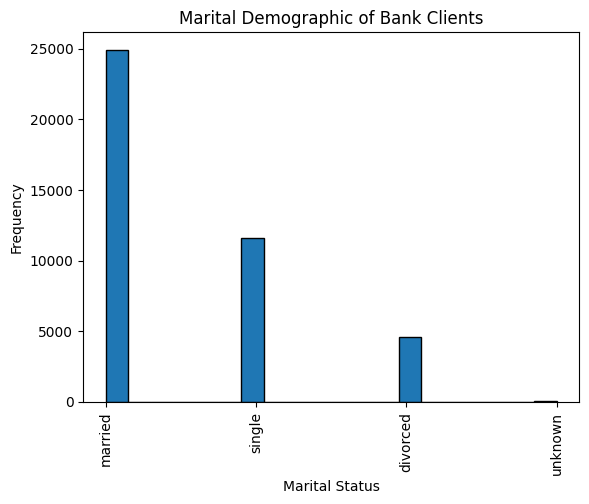

count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

In [9]:
marital_hist = plt.hist(df['marital'], bins=20, edgecolor='black')

plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.title('Marital Demographic of Bank Clients')
plt.xticks(rotation='vertical')
plt.show()

df['marital'].describe()

- the callers were majority married

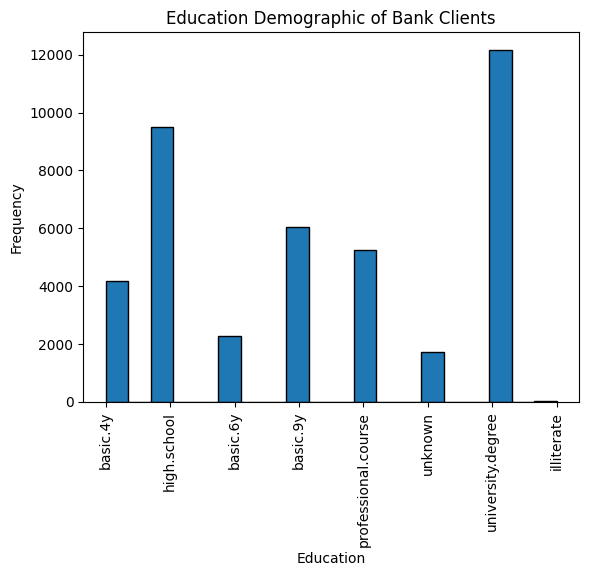

count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

In [10]:
educ_hist = plt.hist(df['education'], bins=20, edgecolor='black')

plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education Demographic of Bank Clients')
plt.xticks(rotation='vertical')
plt.show()

df['education'].describe()

- majority of the callers have a university degree
- the next most common educational attainment among the callers was high school

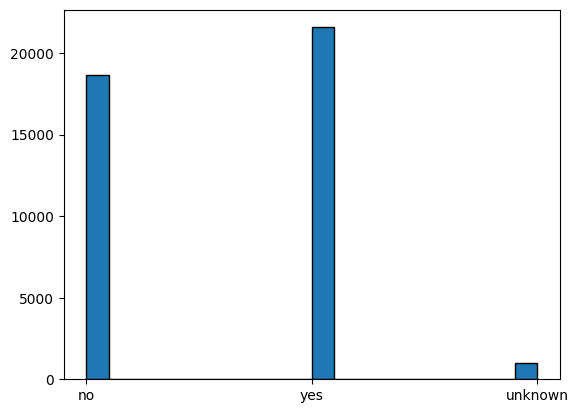

count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

In [11]:
housing_hist = plt.hist(df['housing'], bins=20, edgecolor='black')

plt.show()

df['housing'].describe()

- the demographic of the callers showed that there was a close split between having a housing loan and not having one, with a bit more than half having a housing loan

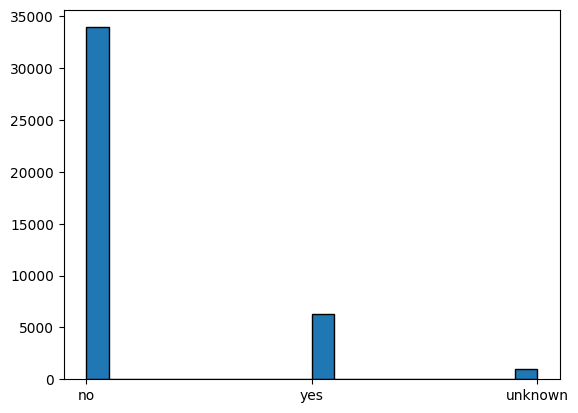

In [12]:
loan_hist = plt.hist(df['loan'], bins=20, edgecolor='black')

plt.show()

- an overwhelming majority of the callers did not have a personal loan

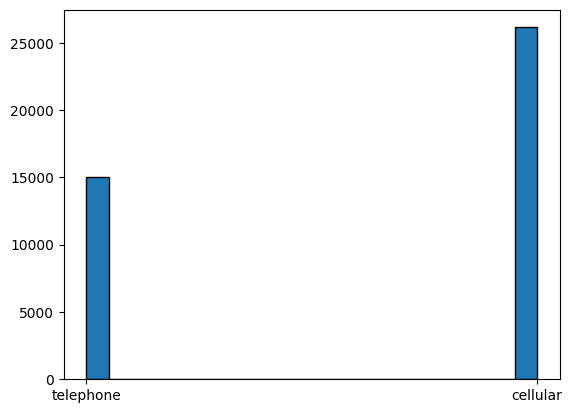

count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

In [13]:
contact_hist = plt.hist(df['contact'], bins=20, edgecolor='black')

plt.show()
df['contact'].describe()

- most of the callers are contacted on their cellphone, rather than on their telephone

So, from the data, the bank's typical caller would be those who are in their 30's to 40's, works in a office, are married, has finished university, probably has a housing loan, but no personal loan, and is only reachable on their cellphone.

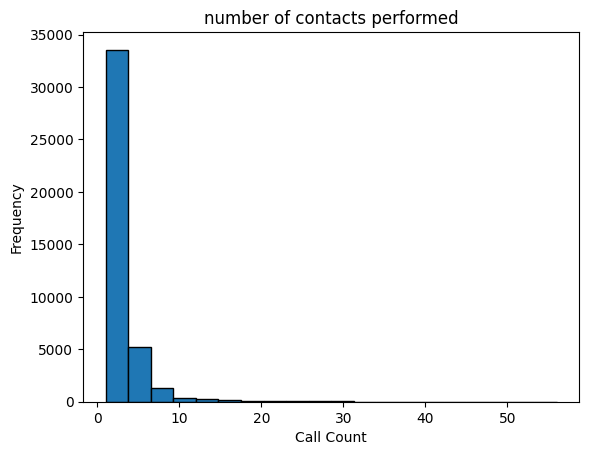

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [14]:
camp_hist = plt.hist(df['campaign'], bins=20, edgecolor='black')

plt.xlabel('Call Count')
plt.ylabel('Frequency')
plt.title('number of contacts performed')
plt.show()
df['campaign'].describe()

- callers were contacted by the bank for campaign 2 to 3 times on average

In [142]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

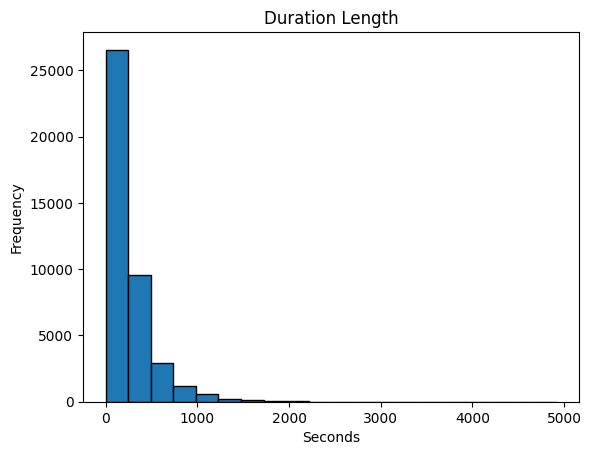

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
median:   180.0
mode:   85, 90


In [164]:
duration_hist = plt.hist(df['duration'], bins=20, edgecolor='black')

plt.xlabel('Seconds')
plt.ylabel('Frequency')
plt.title('Duration Length')
plt.show()
print(df['duration'].describe())
print('median:  ',df['duration'].median())
mode_duration = df['duration'].mode().to_list()
print(f'mode:   {", ".join(map(str, mode_duration))}')

- The mean average call duration is around 4.3 mins long
- The median duration of calls was at 3 mins long
- Interestingly, the most common call durations were around 1.4 mins to 1.5 mins

- So, this may indicate that if the bank can get a potential caller to keep the call going for past 1.5 mins, they may increase their subscription success. However, they would have a limit of 3 to 4 mins to be able to market their term deposit well.

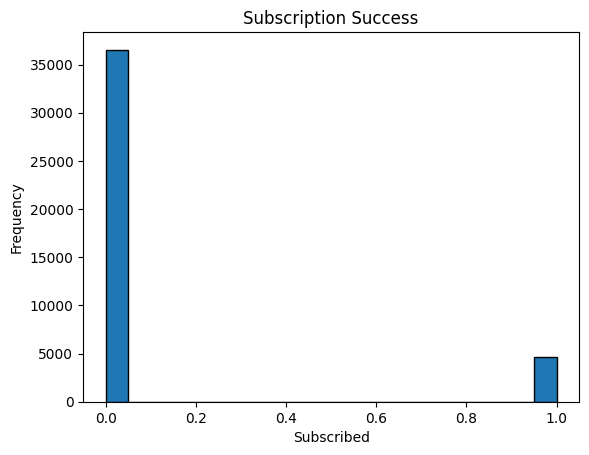

count    41188.000000
mean         0.112654
std          0.316173
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [128]:
sub_hist = plt.hist(df['y'], bins=20, edgecolor='black')

plt.xlabel('Subscribed')
plt.ylabel('Frequency')
plt.title('Subscription Success')
plt.show()
df['y'].describe()

- The actual result of the campaign was that most of all contacted by the bank did not actually subscribe to a term deposit.

In [15]:
# converting 'y' to int

df['y'] = (df['y'] == 'yes').astype(int)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## ML

### Preparing data for ML

In [16]:
# in the information section, it said that 'duration' should not be included, hence we have to drop it

df = df.drop(['duration'], axis=1)


In [17]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

encoding the categorical values

In [18]:
# Using one hot encoding
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

df_encoded = pd.get_dummies(df, columns=categorical_columns)

df_encoded.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


In [19]:
df_encoded.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'mo

split dataset into training, validation, and test datasets

In [20]:
train, valid, test = np.split(df_encoded.sample(frac=1), [int(0.6*len(df_encoded)), int(0.8*len(df_encoded))])

In [21]:
Y = df_encoded['y']
X = df_encoded.drop(columns=['y'])

In [22]:
def scale_dataset(df_encoded, oversample=False):
    X = df_encoded.drop(columns=['y']).values
    Y = df_encoded['y'].values

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X_scaled, Y = ros.fit_resample(X_scaled, Y)

    data = np.hstack((X_scaled, np.reshape(Y, (-1, 1))))

    return data, X_scaled, Y

In [23]:
train, X_train, Y_train = scale_dataset(train, oversample=True)
valid, X_valid, Y_valid = scale_dataset(valid, oversample=False)
test, X_test, Y_test = scale_dataset(test, oversample=False)

Import Models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


In [130]:
# import metrics

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error 

### Logistic Regression

In [58]:
LR_model = LogisticRegression()
LR_model = LR_model.fit(X_train, Y_train)

In [132]:
y_pred = LR_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.95      0.85      0.89      7286
           1       0.35      0.62      0.45       952

    accuracy                           0.82      8238
   macro avg       0.65      0.74      0.67      8238
weighted avg       0.88      0.82      0.84      8238

The RMSE is 0.4204068596637581


### Random Forest

In [65]:
RF_model = RandomForestClassifier()
RF_model = RF_model.fit(X_train, Y_train)

In [133]:
y_pred = RF_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7286
           1       0.49      0.33      0.39       952

    accuracy                           0.88      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.88      0.87      8238

The RMSE is 0.3422573338064604


### Gradient Boost

In [67]:
GB_model = GradientBoostingClassifier()
GB_model = GB_model.fit(X_train, Y_train)

In [134]:
y_pred = GB_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89      7286
           1       0.34      0.65      0.45       952

    accuracy                           0.81      8238
   macro avg       0.64      0.74      0.67      8238
weighted avg       0.88      0.81      0.84      8238

The RMSE is 0.4305351604679065


### SVM

In [69]:
SVM_model = SVC()
SVM_model = SVM_model.fit(X_test, Y_test)

In [135]:
y_pred = SVM_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7286
           1       0.85      0.27      0.41       952

    accuracy                           0.91      8238
   macro avg       0.88      0.63      0.68      8238
weighted avg       0.90      0.91      0.89      8238

The RMSE is 0.3003194867550016


### XGBoost

In [81]:
XGB_model = XGBClassifier()
XGB_model = XGB_model.fit(X_train, Y_train)

In [136]:
y_pred = XGB_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      7286
           1       0.35      0.57      0.43       952

    accuracy                           0.83      8238
   macro avg       0.64      0.71      0.67      8238
weighted avg       0.87      0.83      0.85      8238

The RMSE is 0.41415240447164264


### K Nearest Neighbor

In [86]:
KNN_model = KNeighborsClassifier()
KNN_model = KNN_model.fit(X_train, Y_train)

In [137]:
y_pred = KNN_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      7286
           1       0.26      0.55      0.35       952

    accuracy                           0.77      8238
   macro avg       0.60      0.67      0.61      8238
weighted avg       0.85      0.77      0.80      8238

The RMSE is 0.4832720072269521


### Naive Bayes

In [88]:
NB_model = GaussianNB()
NB_model = NB_model.fit(X_train, Y_train)

In [138]:
y_pred = NB_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7286
           1       0.00      0.00      0.00       952

    accuracy                           0.88      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.78      0.88      0.83      8238

The RMSE is 0.3399441566181709


c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Neural Network

In [91]:
NN_model = MLPClassifier()
NN_model = NN_model.fit(X_test, Y_test)

c:\Users\enzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [139]:
y_pred = NN_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7286
           1       0.96      0.78      0.86       952

    accuracy                           0.97      8238
   macro avg       0.96      0.89      0.92      8238
weighted avg       0.97      0.97      0.97      8238

The RMSE is 0.1724535537782007


### Lets try tensorflow's Neural Network

In [30]:
import tensorflow as tf

In [117]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.legend()
  plt.show()

In [111]:
# Define the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
epochs = 100  
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=32, validation_data=(X_test, Y_test), verbose=0)

model.evaluate(X_test, Y_test)



# # Plot training accuracy
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'], label='Training Accuracy',)
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.legend()

# # Plot training loss
# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()

# plt.tight_layout()
# plt.show()

258/258 [==============================] - 0s 697us/step - loss: 1.2822 - accuracy: 0.8203


[1.2821605205535889, 0.8203447461128235]

In [112]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

258/258 [==============================] - 0s 553us/step


In [140]:
print(classification_report(Y_test, y_pred))
print('The RMSE is', mean_squared_error(Y_test, y_pred, squared = False))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7286
           1       0.96      0.78      0.86       952

    accuracy                           0.97      8238
   macro avg       0.96      0.89      0.92      8238
weighted avg       0.97      0.97      0.97      8238

The RMSE is 0.1724535537782007


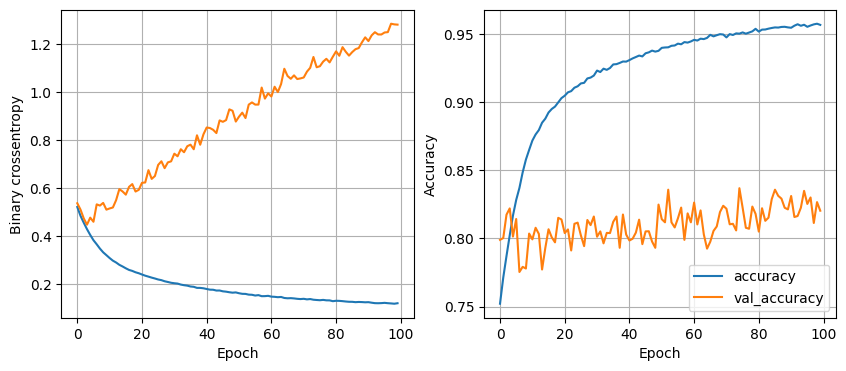

In [118]:
plot_history(history)